In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split

# 回帰問題の評価指標
def evaluate_regression(y_true, y_pred):
    """
    回帰モデルの評価指標を計算する関数
    """
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return {"R^2": r2, "RMSE": rmse, "MAE": mae}

# 分類問題の評価指標
def evaluate_classification(y_true, y_pred):
    """
    分類モデルの評価指標を計算する関数
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# 交差検証
def cross_validation(model, X, y, k=5):
    """
    K-Fold 交差検証を実行する関数
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf)
    return scores.mean()

# 混同行列の可視化
def plot_confusion_matrix(y_true, y_pred):
    """
    混同行列をプロットする関数
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# ROC曲線とAUC
def plot_roc_curve(y_true, y_scores):
    """
    ROC曲線とAUCをプロットする関数
    """
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    return roc_auc


回帰評価指標: {'R^2': 0.9993636078552096, 'RMSE': 0.9419524252704788, 'MAE': 0.6034531651339912}
分類評価指標: {'Accuracy': 0.9, 'Precision': 0.9222222222222222, 'Recall': 0.9, 'F1 Score': 0.9020833333333333}


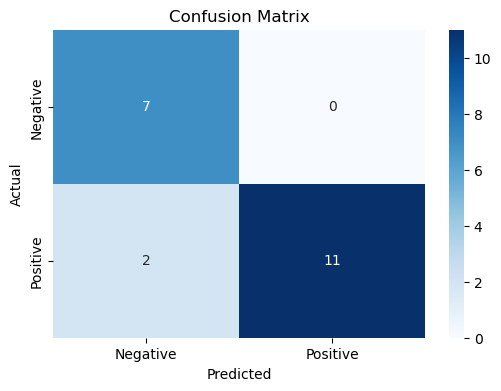

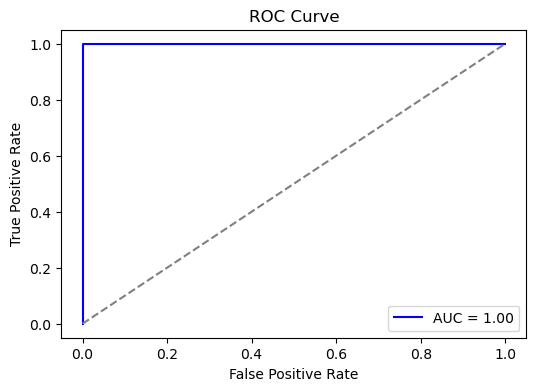

ROC AUC: 1.0


In [2]:
## 回帰問題
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
model_reg = RandomForestRegressor(n_estimators=100, random_state=42)
model_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = model_reg.predict(X_test_reg)
regression_metrics = evaluate_regression(y_test_reg, y_pred_reg)
print("回帰評価指標:", regression_metrics)

## 分類問題
X_clf, y_clf = make_classification(n_samples=100, n_features=5, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
model_clf = RandomForestClassifier(n_estimators=100, random_state=42)
model_clf.fit(X_train_clf, y_train_clf)
y_pred_clf = model_clf.predict(X_test_clf)
classification_metrics = evaluate_classification(y_test_clf, y_pred_clf)
print("分類評価指標:", classification_metrics)

# 混同行列のプロット
plot_confusion_matrix(y_test_clf, y_pred_clf)

# ROC曲線とAUCのプロット
y_scores_clf = model_clf.predict_proba(X_test_clf)[:, 1]
roc_auc_value = plot_roc_curve(y_test_clf, y_scores_clf)
print("ROC AUC:", roc_auc_value)


In [3]:
# データの生成（回帰問題）
X_reg, y_reg = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# モデルの定義（ランダムフォレスト回帰）
model_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# 交差検証の実行
reg_cv_score = cross_validation(model_reg, X_reg, y_reg, k=5)

print("回帰モデルの交差検証スコア（平均 R^2）：", reg_cv_score)


回帰モデルの交差検証スコア（平均 R^2）： 0.7297421575998921


In [4]:
# データの生成（分類問題）
X_clf, y_clf = make_classification(n_samples=100, n_features=5, random_state=42)

# モデルの定義（ランダムフォレスト分類器）
model_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 交差検証の実行
clf_cv_score = cross_validation(model_clf, X_clf, y_clf, k=5)

print("分類モデルの交差検証スコア（平均 Accuracy）：", clf_cv_score)


分類モデルの交差検証スコア（平均 Accuracy）： 0.9200000000000002
